In [63]:
import numpy as np
import sklearn.metrics as metrics
import os

from keras.datasets import cifar10
import keras.callbacks as callbacks
import keras.utils.np_utils as kutils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
import pydotplus as pydot
from keras import backend as K
import importlib
import wide_residual_network_RAM as wrn
importlib.reload(wrn)

<module 'wide_residual_network_RAM' from 'C:\\Users\\Astha\\Dropbox\\data science\\nips paper implementation\\code\\Decathlon-Residual-Adapters-Keras\\wide_residual_network_RAM.py'>

In [64]:
decathlon_data_folder = "C:\\Users\\Astha\\Dropbox\\data science\\nips paper implementation\\code\\data\\decathlon-1.0-data"
tasks = os.listdir(decathlon_data_folder)
nb_tasks = len(tasks)+1 #1 added for imagenet which is not included in this folder

In [65]:
nb_tasks

10

In [66]:
batch_size = 8
nb_epoch = 5
img_rows, img_cols = 32,32
classes = 2

In [67]:
#data_folder = cwd + "\\sample_data\\aircraft\\"
cwd = os.getcwd()
data_folder = cwd + "\\sample_data\\catsdogs\\"

In [68]:
train_datagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
valid_datagen = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)
train_generator = train_datagen.flow_from_directory(data_folder + "train", target_size=(img_rows, img_cols),batch_size=batch_size)
valid_generator = valid_datagen.flow_from_directory(data_folder + "val", target_size=(img_rows, img_cols),batch_size=batch_size)

Found 145 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [69]:
init_shape = (3,img_rows, img_cols ) if K.image_dim_ordering() == 'th' else (img_rows, img_cols ,3)

In [70]:
# For WRN-16-8 put N = 2, k = 8
# For WRN-28-10 put N = 4, k = 10
# For WRN-40-4 put N = 6, k = 4
model = wrn.create_wide_residual_network(init_shape, nb_classes=classes, N=4, k=4, dropout=0.0)

model.summary()
plot_model(model, to_file = "WRN-28-4-RAM.png")

Wide Residual Network-22-4 created.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_150 (Conv2D)             (None, 32, 32, 16)   432         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_131 (BatchN (None, 32, 32, 16)   64          conv2d_150[0][0]                 
__________________________________________________________________________________________________
conv2d_151 (Conv2D)             (None, 32, 32, 1)    144         batch_normalization_131[0][0]    
_________________________________________________________________________

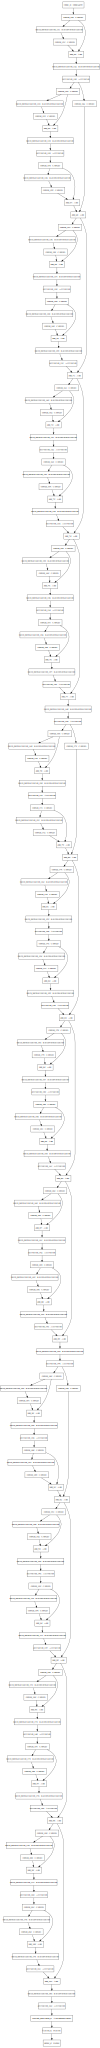

In [71]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [72]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
print("Finished compiling")
print("Allocating GPU memory")

#model.load_weights("weights/WRN-28-8 Weights.h5")
#print("Model loaded.")

Finished compiling
Allocating GPU memory


In [73]:
filepath = "imagenet_wrn_28_4_RAM_weights.h5"
#model.fit_generator(generator.flow(trainX, trainY, batch_size=batch_size), steps_per_epoch=len(trainX) // batch_size + 1, nb_epoch=nb_epoch,callbacks = [callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)],validation_data=(testX, testY),validation_steps=testX.shape[0] // batch_size,)

model.fit_generator(train_generator, steps_per_epoch= len(train_generator), validation_data=valid_generator, validation_steps = len(valid_generator), epochs = 5, callbacks = [callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)])

Epoch 1/5
19/19 [==============================] - 104s 5s/step - loss: 0.6952 - acc: 0.4616 - val_loss: 0.6939 - val_acc: 0.4667
Epoch 2/5
19/19 [==============================] - 57s 3s/step - loss: 0.6833 - acc: 0.6109 - val_loss: 0.6172 - val_acc: 0.6667
Epoch 3/5
19/19 [==============================] - 60s 3s/step - loss: 0.6954 - acc: 0.5647 - val_loss: 0.6684 - val_acc: 0.5333
Epoch 4/5
19/19 [==============================] - 57s 3s/step - loss: 0.6859 - acc: 0.5054 - val_loss: 0.6637 - val_acc: 0.6667
Epoch 5/5
19/19 [==============================] - 63s 3s/step - loss: 0.6864 - acc: 0.5144 - val_loss: 0.6653 - val_acc: 0.7333
